# **Computer Vision base model capable of accurately classifying teeth into 7 distinct categories**

#Loading teeth_data

In [1]:
!pip install gdown
import gdown

In [2]:
file_id = "1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY"
url = f"https://drive.google.com/uc?id={file_id}"
output = "teeth_Dataset.zip"
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY
From (redirected): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY&confirm=t&uuid=dcb6e46d-4a4f-49a9-813d-0b1561d3c0a8
To: /content/teeth_Dataset.zip
100%|██████████| 49.1M/49.1M [00:01<00:00, 40.2MB/s]


'teeth_Dataset.zip'

In [3]:
import zipfile
import os

zip_path = "/content/teeth_Dataset.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir("/content/"))

['.config', 'Teeth_Dataset', 'teeth_Dataset.zip', 'sample_data']


***deleting 3 folders dont need them***

In [4]:
import os
print(os.listdir("/content/Teeth_Dataset/Testing"))

['MC', 'output_image.jpg', 'outputs', 'OC', 'output', 'out', 'CaS', 'CoS', 'OT', 'OLP', 'Gum']


In [5]:
!rm -r /content/Teeth_Dataset/Testing/outputs
!rm -r /content/Teeth_Dataset/Testing/output
!rm -r /content/Teeth_Dataset/Testing/out
!rm -r /content/Teeth_Dataset/Testing/output_image.jpg

In [6]:
import os
print(os.listdir("/content/Teeth_Dataset/Testing"))

['MC', 'OC', 'CaS', 'CoS', 'OT', 'OLP', 'Gum']


#imports

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

#Data preproccesing (Normlization,Augmantation)

In [8]:
import random
img_size=(224,224)
batch_size=32
num_classes=7
seed=42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
train_dirc = "/content/Teeth_Dataset/Training"
val_dirc = "/content/Teeth_Dataset/Validation"
test_dirc = "/content/Teeth_Dataset/Testing"

In [9]:
# Define ImageDataGenerator with augmentations & normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
#normalization of test and validation data
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
# Create training,validation and testing generators
train_generator = train_datagen.flow_from_directory(
    train_dirc,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed)
val_generator = val_datagen.flow_from_directory(
    val_dirc,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed)
test_generator = test_datagen.flow_from_directory(
    test_dirc,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


#visualization

***visualize pic before and after augmantation***

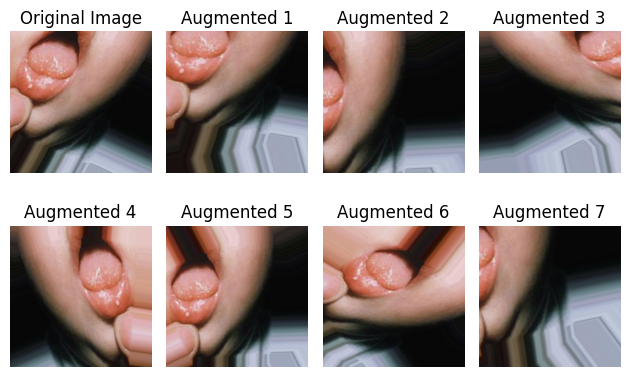

In [13]:
images, labels = next(train_generator)
original_image = images[0]

temp_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

original_image_expanded = np.expand_dims(original_image, axis=0)

plt.subplot(2, 4, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

for i, batch in enumerate(temp_datagen.flow(original_image_expanded, batch_size=1)):
    if i == 7:
        break
    plt.subplot(2, 4, i + 2)
    augmented_image = batch[0]
    plt.imshow(augmented_image)
    plt.title(f'Augmented {i+1}')
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Model architecture

In [ ]:
# input_shape=[224,224,3]
# Model_1=tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=None,padding='same',input_shape=input_shape),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation("relu"),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=None,padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation("relu"),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.3),

#     tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=None,padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation("relu"),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Dropout(0.4),

#     tf.keras.layers.GlobalAveragePooling2D(),


#     tf.keras.layers.Dense(units=64,activation="relu"),


#     tf.keras.layers.Dense(units=7,activation="softmax")
#     ])

In [14]:
input_shape=[224,224,3]
Model_2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding='same',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),



    tf.keras.layers.Dense(units=64,activation="relu"),



    tf.keras.layers.Dense(units=7,activation="softmax")
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
Model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     6,422,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,516,295 (24.86 MB)

 Trainable params: 6,516,295 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

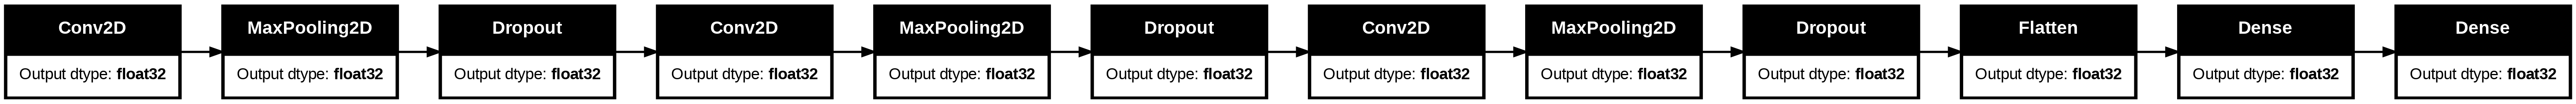

In [16]:
tf.keras.utils.plot_model(Model_2,rankdir="LR",show_dtype=True)

In [17]:
optimizer = tf.keras.optimizers.Adam()
Model_2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Fitting

In [18]:
# This callback saves the best model based on validation accuracy
model_checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',  # File path to save the model
    save_best_only=True,         # Only save the model if `val_accuracy` has improved
    monitor='val_accuracy',      # The metric to monitor
    mode='max',                  # 'max' because we want to maximize accuracy
    verbose=1                    # Prints a message when the model is saved
)

In [ ]:
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

In [ ]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# # This callback reduces the learning rate when validation loss plateaus
# reduce_lr_callback = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.2,         # Factor by which the learning rate will be reduced (new_lr = lr * factor)
#     patience=3,         # Number of epochs with no improvement to wait before reducing LR
#     mode='min',
#     verbose=1,
#     min_lr=0.00001      # Lower bound on the learning rate
# )

In [19]:
history = Model_2.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[model_checkpoint_callback]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.1410 - loss: 2.1583
Epoch 1: val_accuracy improved from -inf to 0.19553, saving model to best_model.keras
97/97 ━━━━━━━━━━━━━━━━━━━━ 56s 486ms/step - accuracy: 0.1413 - loss: 2.1566 - val_accuracy: 0.1955 - val_loss: 1.8990
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.2078 - loss: 1.9009
Epoch 2: val_accuracy improved from 0.19553 to 0.27724, saving model to best_model.keras
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 411ms/step - accuracy: 0.2081 - loss: 1.9006 - val_accuracy: 0.2772 - val_loss: 1.8284
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.2745 - loss: 1.8082
Epoch 3: val_accuracy improved from 0.27724 to 0.31128, saving model to best_model.keras
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 411ms/step - accuracy: 0.2746 - loss: 1.8081 - val_accuracy: 0.3113 - val_loss: 1.7683
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.2801 - loss: 1.7902
Epoch 4: val_accuracy improved fro

#visualize the model training & loss

In [20]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Args:
      history: The history object returned from model.fit().
    """
    # Extracting accuracy and loss values from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    # Create a figure with two subplots
    plt.figure(figsize=(14, 6))

    # Subplot for Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    # Subplot for Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Display the plots
    plt.show()



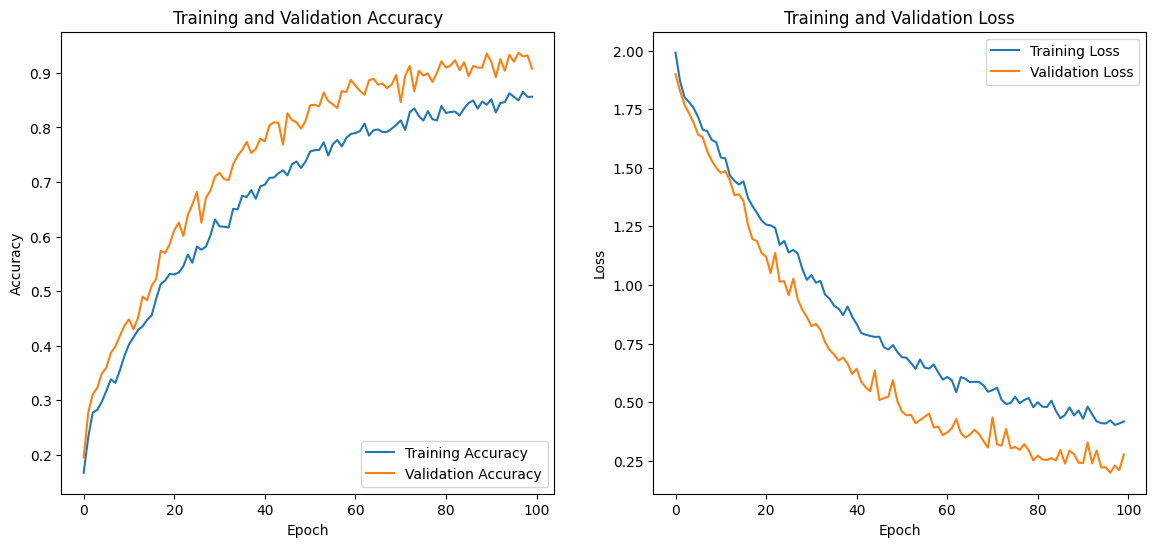

In [22]:
plot_training_history(history)

In [23]:
loss,acc=Model_2.evaluate(test_generator)
print("loss:",loss)
print("acc:",acc)

 1/33 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9062 - loss: 0.2202

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9263 - loss: 0.1970
loss: 0.25689998269081116
acc: 0.9085603356361389


In [24]:
# Make predictions on the test data
predictions = Model_2.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


In [25]:
# Get the true class labels
true_classes = test_generator.classes
class_indices = test_generator.class_indices
class_names = list(class_indices.keys())

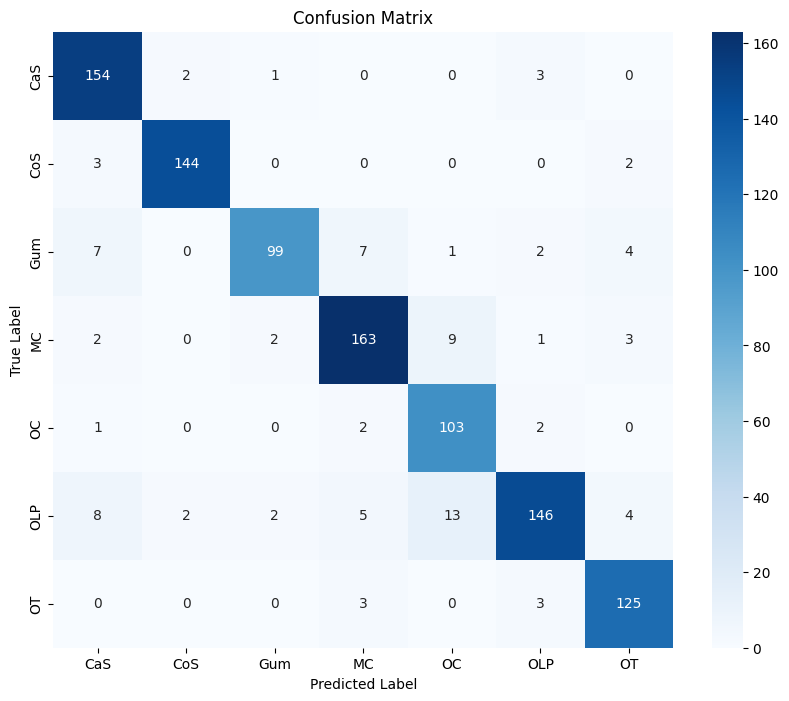

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Saving the model

In [27]:
Model_2.save("teeth_base_model.h5")